# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output-data/cities.csv"

# Output File Path (png)
png_path = "../output-data/"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"{len(cities)}")

624


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + "luena").json()
response

{'coord': {'lon': 19.92, 'lat': -11.78},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 80.94,
  'feels_like': 79.14,
  'temp_min': 80.94,
  'temp_max': 80.94,
  'pressure': 1005,
  'humidity': 35,
  'sea_level': 1005,
  'grnd_level': 864},
 'visibility': 10000,
 'wind': {'speed': 3.69, 'deg': 28},
 'clouds': {'all': 25},
 'dt': 1603208471,
 'sys': {'country': 'AO', 'sunrise': 1603167156, 'sunset': 1603211832},
 'timezone': 3600,
 'id': 3347719,
 'name': 'Luena',
 'cod': 200}

In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
city_list = []
lat = []
lng = []
temp = []
hmdty = []
cloudi = []
wspeed = []
country = []
date = []

print("Processing beginning...")
# Loop through the list of cities and perform a request for data on each
for city in cities:
    time.sleep(1.2)
       
    try:    
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hmdty.append(response['main']['humidity'])
        cloudi.append(response['clouds']['all'])
        wspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        formatted_date = datetime.date.fromtimestamp(response['dt'])
        date.append(formatted_date)
        city_list.append(city)
        print(f"Processing record {cities.index(city)+1} of {len(cities)} | {city}")
    
    except (ValueError, KeyError):
        print(f"Processing record {cities.index(city)+1} of {len(cities)} | {city} not valid")

print("Processing complete.")

Processing beginning...
Processing record 1 of 624 | wenceslau braz
Processing record 2 of 624 | ushuaia
Processing record 3 of 624 | piacabucu
Processing record 4 of 624 | freeport
Processing record 5 of 624 | leningradskiy
Processing record 6 of 624 | lata
Processing record 7 of 624 | waingapu
Processing record 8 of 624 | barentsburg not valid
Processing record 9 of 624 | boa vista
Processing record 10 of 624 | hithadhoo
Processing record 11 of 624 | busselton
Processing record 12 of 624 | rikitea
Processing record 13 of 624 | beringovskiy
Processing record 14 of 624 | kapaa
Processing record 15 of 624 | pittsfield
Processing record 16 of 624 | gitarama
Processing record 17 of 624 | nome
Processing record 18 of 624 | albany
Processing record 19 of 624 | anadyr
Processing record 20 of 624 | camana
Processing record 21 of 624 | nikolskoye
Processing record 22 of 624 | hobart
Processing record 23 of 624 | saint-joseph
Processing record 24 of 624 | punta arenas
Processing record 25 of 62

Processing record 203 of 624 | sioux lookout
Processing record 204 of 624 | necochea
Processing record 205 of 624 | ayr
Processing record 206 of 624 | yaan
Processing record 207 of 624 | itacoatiara
Processing record 208 of 624 | dingle
Processing record 209 of 624 | bubaque
Processing record 210 of 624 | ayan
Processing record 211 of 624 | shenjiamen
Processing record 212 of 624 | ngukurr not valid
Processing record 213 of 624 | torbay
Processing record 214 of 624 | souillac
Processing record 215 of 624 | sao joao da barra
Processing record 216 of 624 | sibu
Processing record 217 of 624 | krasnoye
Processing record 218 of 624 | grand river south east not valid
Processing record 219 of 624 | zhangjiakou
Processing record 220 of 624 | bilma
Processing record 221 of 624 | cockburn town
Processing record 222 of 624 | hambantota
Processing record 223 of 624 | galle
Processing record 224 of 624 | havoysund
Processing record 225 of 624 | jalu
Processing record 226 of 624 | kirakira
Processin

Processing record 399 of 624 | agua dulce
Processing record 400 of 624 | kihei
Processing record 401 of 624 | chur
Processing record 402 of 624 | auki
Processing record 403 of 624 | palmer
Processing record 404 of 624 | skawina
Processing record 405 of 624 | nouadhibou
Processing record 406 of 624 | namanga
Processing record 407 of 624 | lagoa
Processing record 408 of 624 | gat
Processing record 409 of 624 | egvekinot
Processing record 410 of 624 | kiunga
Processing record 411 of 624 | derzhavinsk
Processing record 412 of 624 | kjopsvik
Processing record 413 of 624 | segovia
Processing record 414 of 624 | laguna
Processing record 415 of 624 | ostrovnoy
Processing record 416 of 624 | wanganui
Processing record 417 of 624 | lolua not valid
Processing record 418 of 624 | bonavista
Processing record 419 of 624 | mandiana
Processing record 420 of 624 | wuwei
Processing record 421 of 624 | juneau
Processing record 422 of 624 | stryn
Processing record 423 of 624 | yulara
Processing record 424

Processing record 601 of 624 | toftir not valid
Processing record 602 of 624 | sokoni
Processing record 603 of 624 | kushima
Processing record 604 of 624 | providencia
Processing record 605 of 624 | ust-bolsheretsk not valid
Processing record 606 of 624 | oksfjord
Processing record 607 of 624 | shitanjing
Processing record 608 of 624 | abha
Processing record 609 of 624 | dosso
Processing record 610 of 624 | saveh
Processing record 611 of 624 | urumqi
Processing record 612 of 624 | mae hong son
Processing record 613 of 624 | odienne
Processing record 614 of 624 | marfino
Processing record 615 of 624 | honningsvag
Processing record 616 of 624 | bowen
Processing record 617 of 624 | bandarbeyla
Processing record 618 of 624 | novorzhev
Processing record 619 of 624 | turukhansk
Processing record 620 of 624 | cururupu
Processing record 621 of 624 | birjand
Processing record 622 of 624 | pravia
Processing record 623 of 624 | baruun-urt
Processing record 624 of 624 | cozumel
Processing complete

## Convert Raw Data to DataFrame

In [5]:
weather_df = pd.DataFrame({
    "City": city_list,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": hmdty,
    "Cloudiness": cloudi,
    "Wind Speed": wspeed,
    "Country": country,
    "Date": date
})


In [6]:
# Save dataframe as CSV, drop indices
weather_df.to_csv(output_data_file, index=False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wenceslau braz,-23.87,-49.80,82.00,75,23,3.00,BR,2020-10-20
1,ushuaia,-54.80,-68.30,42.80,60,75,23.04,AR,2020-10-20
2,piacabucu,-10.41,-36.43,82.80,59,15,13.15,BR,2020-10-20
3,freeport,40.66,-73.58,64.99,93,90,4.70,US,2020-10-20
4,leningradskiy,69.38,178.42,31.28,91,82,9.28,RU,2020-10-20


## Plotting the Data
* Define scatter plot function.
* Save the plotted figures as .pngs.

In [7]:
def graphs(x_values, y_values):
    graph_labels = {
        "Lat": "Latitude",
        "Max Temp": "Max Temperature (degrees F)",
        "Humidity": "Humidity (%)",
        "Cloudiness": "Cloudiness (%)",
        "Wind Speed": "Wind Speed (mph)"
    }
    plt.scatter(x_values, y_values, facecolors="skyblue", edgecolors="b")
    
    # Set y-axis 10% higher than largest value to allow room for annotations
    down, up = plt.ylim()
    plt.ylim(down, up+up*0.1)
    plt.xlabel(graph_labels[x_values.name])
    plt.ylabel(graph_labels[y_values.name])
    plt.title(f"City {graph_labels[y_values.name]} vs. {graph_labels[x_values.name]} (on {formatted_date})")

### Latitude vs. Temperature Plot

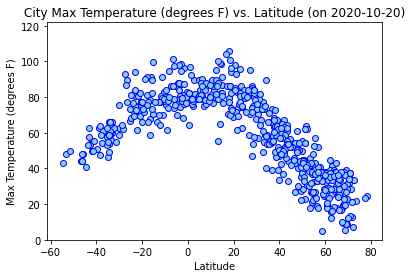

In [8]:
graphs(weather_df["Lat"],weather_df["Max Temp"])
plt.savefig(png_path+"max_temp_vs_lat.png")
plt.show()

### Latitude vs. Humidity Plot

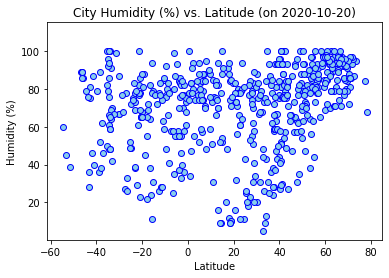

In [9]:
graphs(weather_df["Lat"],weather_df["Humidity"])
plt.savefig(png_path+"humidity_vs_lat.png")
plt.show()

### Latitude vs. Cloudiness Plot

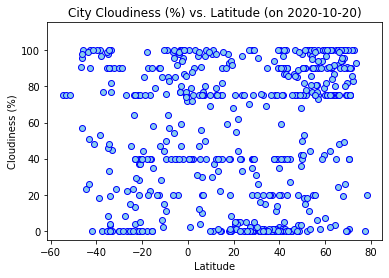

In [10]:
graphs(weather_df["Lat"],weather_df["Cloudiness"])
plt.savefig(png_path+"cloudiness_vs_lat.png")
plt.show()

### Latitude vs. Wind Speed Plot

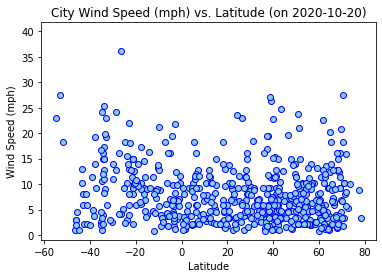

In [11]:
graphs(weather_df["Lat"],weather_df["Wind Speed"])
plt.savefig(png_path+"wind_speed_vs_lat.png")
plt.show()

## Linear Regression

### Write linear regression plot function

In [12]:
def regressions(x_values, y_values):
    # Calls graphs function
    graphs(x_values,y_values)
    
    # Defines and plots regression line and label
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    regress_values = x_values * slope + intercept
    plt.annotate(line_eq, xy=(0.4, 0.9), xycoords='axes fraction', fontsize=15, color="red")
    plt.plot(x_values, regress_values, color="red")
    
    # Prints line string and r-squared
    print(f"The data can be approximated with {line_eq}.")
    print(f"R-squared is {round(rvalue**2, 4)}.")

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The data can be approximated with y = -1.03x + 96.33.
R-squared is 0.7878.


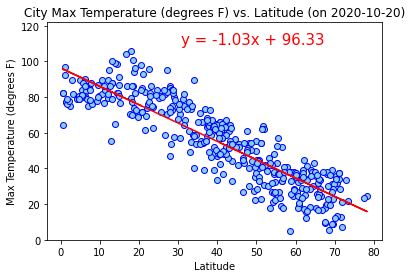

In [13]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]>0],weather_df["Max Temp"].loc[weather_df["Lat"]>0])
plt.savefig(png_path+"max_temp_vs_lat_north.png")
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The data can be approximated with y = 0.76x + 87.89.
R-squared is 0.6096.


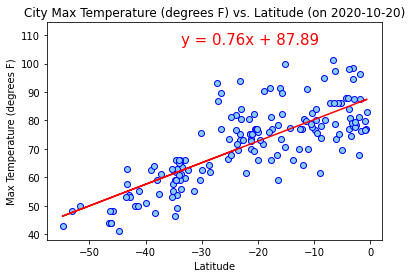

In [14]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]<0],weather_df["Max Temp"].loc[weather_df["Lat"]<0])
plt.savefig(png_path+"max_temp_vs_lat_south.png")
plt.show()

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The data can be approximated with y = 0.39x + 57.47.
R-squared is 0.1215.


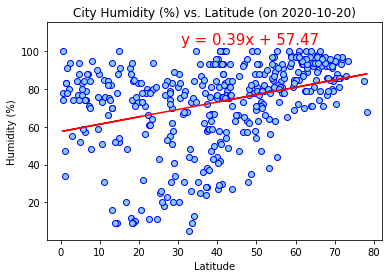

In [15]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]>0],weather_df["Humidity"].loc[weather_df["Lat"]>0])
plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The data can be approximated with y = -0.06x + 64.76.
R-squared is 0.0014.


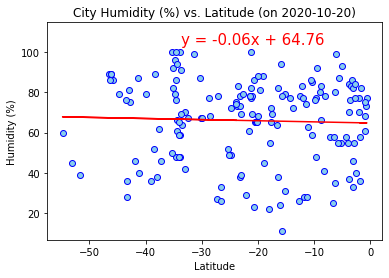

In [16]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]<0],weather_df["Humidity"].loc[weather_df["Lat"]<0])
plt.show()

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The data can be approximated with y = 0.54x + 32.41.
R-squared is 0.0795.


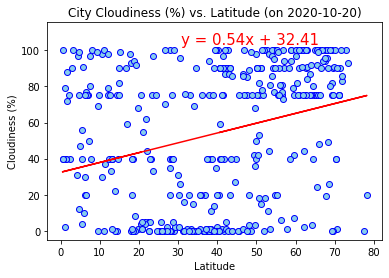

In [17]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]>0],weather_df["Cloudiness"].loc[weather_df["Lat"]>0])
plt.savefig(png_path+"cloudiness_vs_lat_north.png")
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The data can be approximated with y = 0.3x + 59.77.
R-squared is 0.0131.


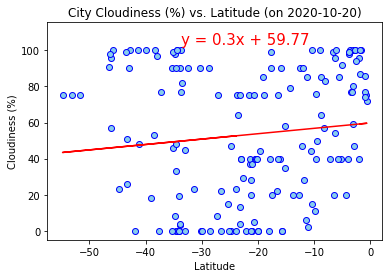

In [18]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]<0],weather_df["Cloudiness"].loc[weather_df["Lat"]<0])
plt.savefig(png_path+"cloudiness_vs_lat_south.png")
plt.show()

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The data can be approximated with y = 0.02x + 6.48.
R-squared is 0.0057.


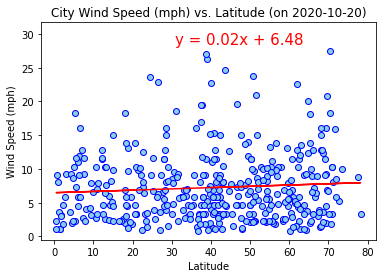

In [19]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]>0],weather_df["Wind Speed"].loc[weather_df["Lat"]>0])
plt.savefig(png_path+"wind_speed_vs_lat_north.png")
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The data can be approximated with y = -0.07x + 7.96.
R-squared is 0.0244.


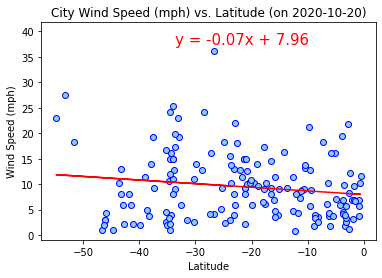

In [20]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]<0],weather_df["Wind Speed"].loc[weather_df["Lat"]<0])
plt.savefig(png_path+"wind_speed_vs_lat_south.png")
plt.show()